In [1]:
import numpy as np
import random
import os
import cv2
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
TEST_DIR = "./Images_Cropped/cropped_testing"
TRAIN_DIR = "./Images_Cropped/cropped_training"
IMG_SIZE = 224
CATEGORIES = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

In [3]:
def create_dataset(data_dir):
    data = []
    for category in CATEGORIES:
        path = os.path.join(data_dir, category)
        class_num = CATEGORIES.index(category)
        for img_name in tqdm(os.listdir(path), desc=f"Processing {category}"):
            img_array = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([new_array, class_num])
    random.shuffle(data)
    return data

In [4]:
print("**********Train Data**********")
training_data = create_dataset(TRAIN_DIR)
print("**********Test Data**********")
testing_data = create_dataset(TEST_DIR)

**********Train Data**********


Processing glioma_tumor:   0%|          | 0/4129 [00:00<?, ?it/s]

Processing pituitary_tumor: 100%|██████████| 4135/4135 [00:20<00:00, 200.61it/s]


**********Test Data**********


Processing pituitary_tumor: 100%|██████████| 370/370 [00:03<00:00, 116.57it/s]


In [5]:
# Saving datasets to pickle files
def save_to_pickle(data, filename):
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, "wb") as file:
        pickle.dump(data, file)

In [6]:
save_to_pickle(training_data, "./Data_In_Pickle/train_data.pickle")
save_to_pickle(testing_data, "./Data_In_Pickle/test_data.pickle")

In [7]:
def load_from_pickle(filename):
    with open(filename, "rb") as file:
        data = pickle.load(file)
    return data

In [8]:
X_train, Y_train = zip(*training_data)
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test, Y_test = zip(*testing_data)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

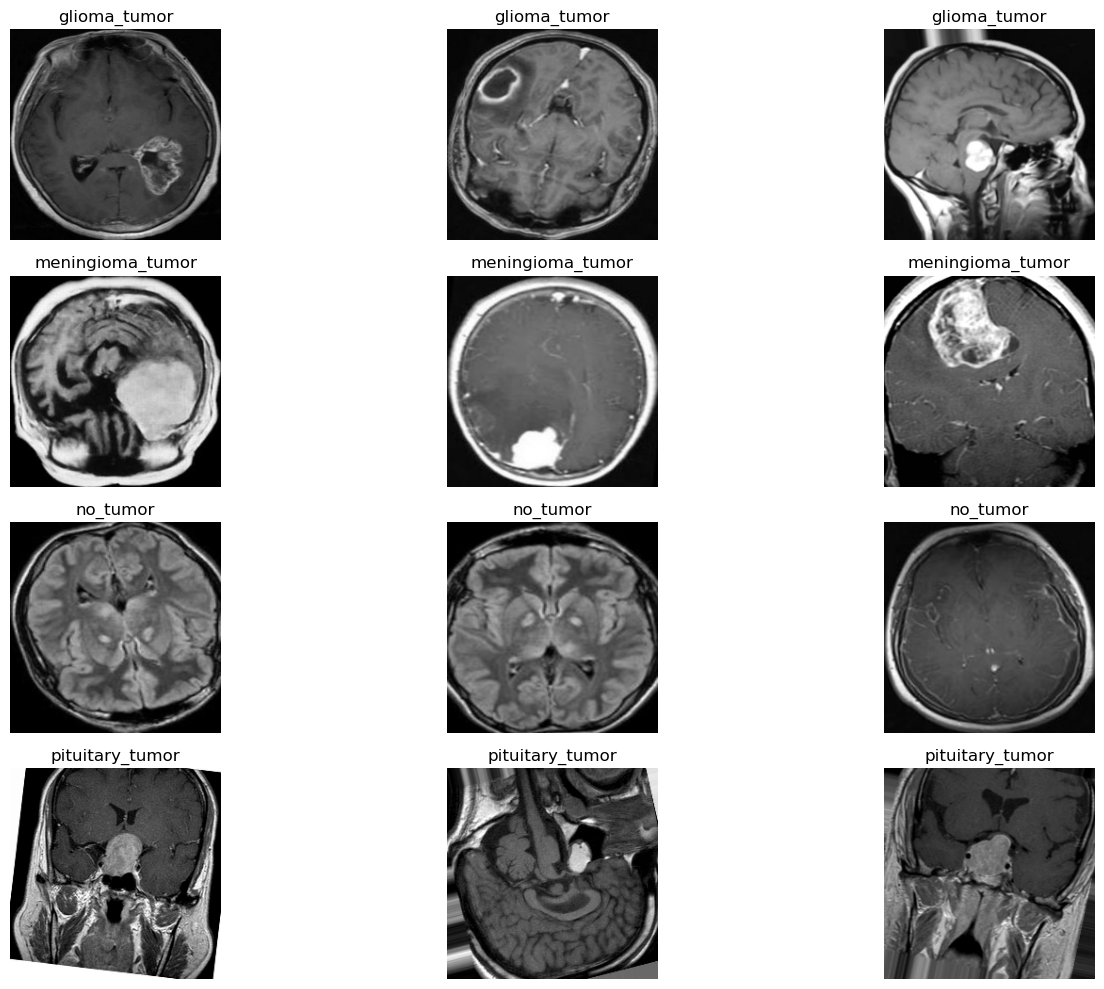

In [9]:
NUM_SAMPLES_PER_CATEGORY = 3


def plot_samples(data):
    fig, axes = plt.subplots(
        len(CATEGORIES), NUM_SAMPLES_PER_CATEGORY, figsize=(15, 10)
    )

    for i, category in enumerate(CATEGORIES):
        category_data = [sample for sample in data if sample[1] == i]
        selected_samples = random.sample(category_data, NUM_SAMPLES_PER_CATEGORY)

        for j, (image, label) in enumerate(selected_samples):
            axes[i, j].imshow(image)
            axes[i, j].set_title(category)
            axes[i, j].axis("off")

    plt.tight_layout()
    plt.show()


plot_samples(testing_data)

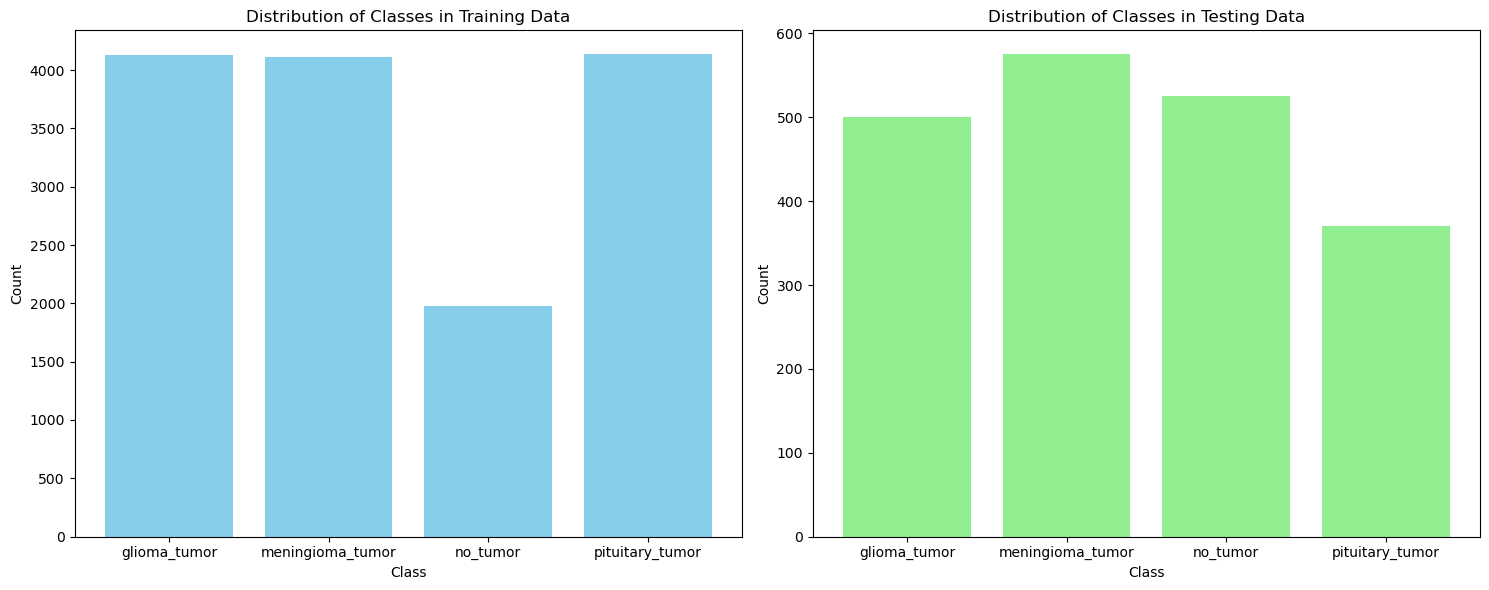

Type of X_train: <class 'numpy.ndarray'>
Shape of X_train: (14347, 224, 224, 3)


In [10]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(
    CATEGORIES, [np.sum(Y_train == i) for i in range(len(CATEGORIES))], color="skyblue"
)
plt.title("Distribution of Classes in Training Data")
plt.xlabel("Class")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
plt.bar(
    CATEGORIES,
    [np.sum(Y_test == i) for i in range(len(CATEGORIES))],
    color="lightgreen",
)
plt.title("Distribution of Classes in Testing Data")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print("Type of X_train:", type(X_train))
print("Shape of X_train:", X_train.shape)

In [11]:
def load_from_pickle(filename):
    with open(filename, "rb") as file:
        data = pickle.load(file)
    return data

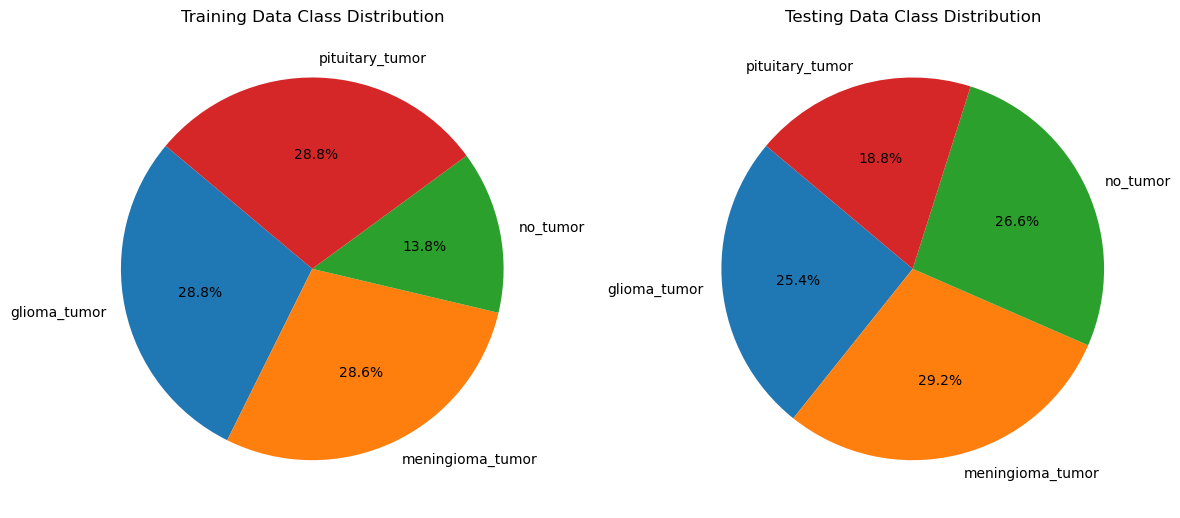

In [12]:
training_data = load_from_pickle("./Data_In_Pickle/train_data.pickle")
testing_data = load_from_pickle("./Data_In_Pickle/test_data.pickle")

train_class_counts = [sum(1 for _, label in training_data if label == i) for i in range(len(CATEGORIES))]
test_class_counts = [sum(1 for _, label in testing_data if label == i) for i in range(len(CATEGORIES))]

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.pie(train_class_counts, labels=CATEGORIES, autopct='%1.1f%%', startangle=140)
plt.title('Training Data Class Distribution')


plt.subplot(1, 2, 2)
plt.pie(test_class_counts, labels=CATEGORIES, autopct='%1.1f%%', startangle=140)
plt.title('Testing Data Class Distribution')
plt.tight_layout()
plt.show()